In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
c1,c2,c3,c4=1/6, 1/3, 1/3 ,1/6
a2,a3,a4=1/2,1/2,1
b21,b31,b32,b41,b42,b43=1/2,0,1/2,0,0,1

k = 50 
a = 1 
g = -9.81 
m = 1 
beta = 2.5 
x0 = 0.4 
y0 = 0.1 
tmax = 10
dt = 0.001

l0 = np.sqrt((a/2)**2 + (a/2)**2)
am = -a/2
ap = a/2

def fx(t, x, y, vx, vy):
    return vx
def fy(t, x, y, vx, vy):
    return vy
def fvx(t, x, y, vx, vy):
    l1x = (1-l0/np.sqrt((x+ap)**2+(y+am)**2))*(x+ap)
    l2x = (1-l0/np.sqrt((x+am)**2+(y+am)**2))*(x+am)
    l3x = (1-l0/np.sqrt((x+am)**2+(y+ap)**2))*(x+am)
    l4x = (1-l0/np.sqrt((x+ap)**2+(y+ap)**2))*(x+ap)
    fx = -beta*np.sqrt(vx**2+vy**2)*vx
    return -k*(l1x+l2x+l3x+l4x) + fx
def fvy(t, x, y, vx, vy):
    l1y = (1-l0/np.sqrt((x+ap)**2+(y+am)**2))*(y+am)
    l2y = (1-l0/np.sqrt((x+am)**2+(y+am)**2))*(y+am)
    l3y = (1-l0/np.sqrt((x+am)**2+(y+ap)**2))*(y+ap)
    l4y = (1-l0/np.sqrt((x+ap)**2+(y+ap)**2))*(y+ap)
    fy = -beta*np.sqrt(vx**2+vy**2)*vy
    return -k*(l1y+l2y+l3y+l4y) + fy + m*g

ttab = np.arange(0, tmax, dt)
xtab = np.zeros(len(ttab))
ytab = np.zeros(len(ttab))
vxtab = np.zeros(len(ttab))
vytab = np.zeros(len(ttab))
xtab[0] = x0
ytab[0] = y0
vxtab[0] = 0
vytab[0] = 0

for i in range(1,len(ttab)):
    K1x = fx(ttab[i-1],xtab[i-1],ytab[i-1],vxtab[i-1],vytab[i-1])
    K1y = fy(ttab[i-1],xtab[i-1],ytab[i-1],vxtab[i-1],vytab[i-1])
    K1vx = fvx(ttab[i-1],xtab[i-1],ytab[i-1],vxtab[i-1],vytab[i-1])
    K1vy = fvy(ttab[i-1],xtab[i-1],ytab[i-1],vxtab[i-1],vytab[i-1])
    K2x = fx(ttab[i-1]+a2*dt,xtab[i-1]+b21*K1x*dt,ytab[i-1]+b21*K1y*dt,vxtab[i-1]+b21*K1vx*dt,vytab[i-1]+b21*K1vy*dt)
    K2y = fy(ttab[i-1]+a2*dt,xtab[i-1]+b21*K1x*dt,ytab[i-1]+b21*K1y*dt,vxtab[i-1]+b21*K1vx*dt,vytab[i-1]+b21*K1vy*dt)
    K2vx = fvx(ttab[i-1]+a2*dt,xtab[i-1]+b21*K1x*dt,ytab[i-1]+b21*K1y*dt,vxtab[i-1]+b21*K1vx*dt,vytab[i-1]+b21*K1vy*dt)
    K2vy = fvy(ttab[i-1]+a2*dt,xtab[i-1]+b21*K1x*dt,ytab[i-1]+b21*K1y*dt,vxtab[i-1]+b21*K1vx*dt,vytab[i-1]+b21*K1vy*dt)
    K3x = fx(ttab[i-1]+a3*dt,xtab[i-1]+b31*K1x*dt+b32*K2x*dt,ytab[i-1]+b31*K1y*dt+b32*K2y*dt,vxtab[i-1]+b31*K1vx*dt+b32*K2vx*dt,vytab[i-1]+b31*K1vy*dt+b32*K2vy*dt)
    K3y = fy(ttab[i-1]+a3*dt,xtab[i-1]+b31*K1x*dt+b32*K2x*dt,ytab[i-1]+b31*K1y*dt+b32*K2y*dt,vxtab[i-1]+b31*K1vx*dt+b32*K2vx*dt,vytab[i-1]+b31*K1vy*dt+b32*K2vy*dt)
    K3vx = fvx(ttab[i-1]+a3*dt,xtab[i-1]+b31*K1x*dt+b32*K2x*dt,ytab[i-1]+b31*K1y*dt+b32*K2y*dt,vxtab[i-1]+b31*K1vx*dt+b32*K2vx*dt,vytab[i-1]+b31*K1vy*dt+b32*K2vy*dt)
    K3vy = fvy(ttab[i-1]+a3*dt,xtab[i-1]+b31*K1x*dt+b32*K2x*dt,ytab[i-1]+b31*K1y*dt+b32*K2y*dt,vxtab[i-1]+b31*K1vx*dt+b32*K2vx*dt,vytab[i-1]+b31*K1vy*dt+b32*K2vy*dt)
    K4x = fx(ttab[i-1]+a4*dt,xtab[i-1]+b41*K1x*dt+b42*K2x*dt+b43*K3x*dt,ytab[i-1]+b41*K1y*dt+b42*K2y*dt+b43*K3y*dt,vxtab[i-1]+b41*K1vx*dt+b42*K2vx*dt+b43*K3vx*dt,vytab[i-1]+b41*K1vy*dt+b42*K2vy*dt+b43*K3vy*dt)
    K4y = fy(ttab[i-1]+a4*dt,xtab[i-1]+b41*K1x*dt+b42*K2x*dt+b43*K3x*dt,ytab[i-1]+b41*K1y*dt+b42*K2y*dt+b43*K3y*dt,vxtab[i-1]+b41*K1vx*dt+b42*K2vx*dt+b43*K3vx*dt,vytab[i-1]+b41*K1vy*dt+b42*K2vy*dt+b43*K3vy*dt)
    K4vx = fvx(ttab[i-1]+a4*dt,xtab[i-1]+b41*K1x*dt+b42*K2x*dt+b43*K3x*dt,ytab[i-1]+b41*K1y*dt+b42*K2y*dt+b43*K3y*dt,vxtab[i-1]+b41*K1vx*dt+b42*K2vx*dt+b43*K3vx*dt,vytab[i-1]+b41*K1vy*dt+b42*K2vy*dt+b43*K3vy*dt)
    K4vy = fvy(ttab[i-1]+a4*dt,xtab[i-1]+b41*K1x*dt+b42*K2x*dt+b43*K3x*dt,ytab[i-1]+b41*K1y*dt+b42*K2y*dt+b43*K3y*dt,vxtab[i-1]+b41*K1vx*dt+b42*K2vx*dt+b43*K3vx*dt,vytab[i-1]+b41*K1vy*dt+b42*K2vy*dt+b43*K3vy*dt)
        
    xtab[i] = xtab[i-1]+(c1*K1x+c2*K2x+c3*K3x+c4*K4x)*dt
    ytab[i] = ytab[i-1]+(c1*K1y+c2*K2y+c3*K3y+c4*K4y)*dt
    vxtab[i] = vxtab[i-1]+(c1*K1vx+c2*K2vx+c3*K3vx+c4*K4vx)*dt
    vytab[i] = vytab[i-1]+(c1*K1vy+c2*K2vy+c3*K3vy+c4*K4vy)*dt

(-0.5, 0.5, -0.5, 0.5)

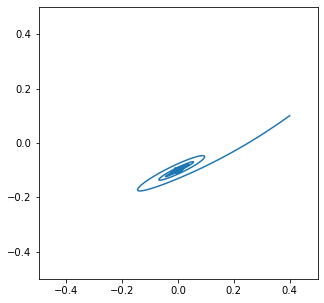

In [8]:
plt.figure(figsize=(5,5))
plt.plot(xtab,ytab)
plt.axis([-1/2,1/2,-1/2,1/2])